# PART - 1

DNA to RNA

In [ ]:
dna = 'ATGGGCTATGCGTAT'
rna = []

for base in dna:
    if base == 'T':
        rna.append('U')
    else:
        rna.append(base)
    
print("DNA : ",*dna, sep = '----')
print("RNA : ",rna)

# PART - 2

GC Nucleotide Occurence

In [ ]:
dna = 'AATGCTTCGCGGCATCAGTC'
total_gc = 0

for base in dna:
    if base == 'G' or base == 'C':
        total_gc += 1
        
ratio = (total_gc / len(dna)) * 100

print("DNA Length :",len(dna), "- Total GC :",total_gc)
print("%",round(ratio), "of nucleotides are G/C ")    


# PART - 3

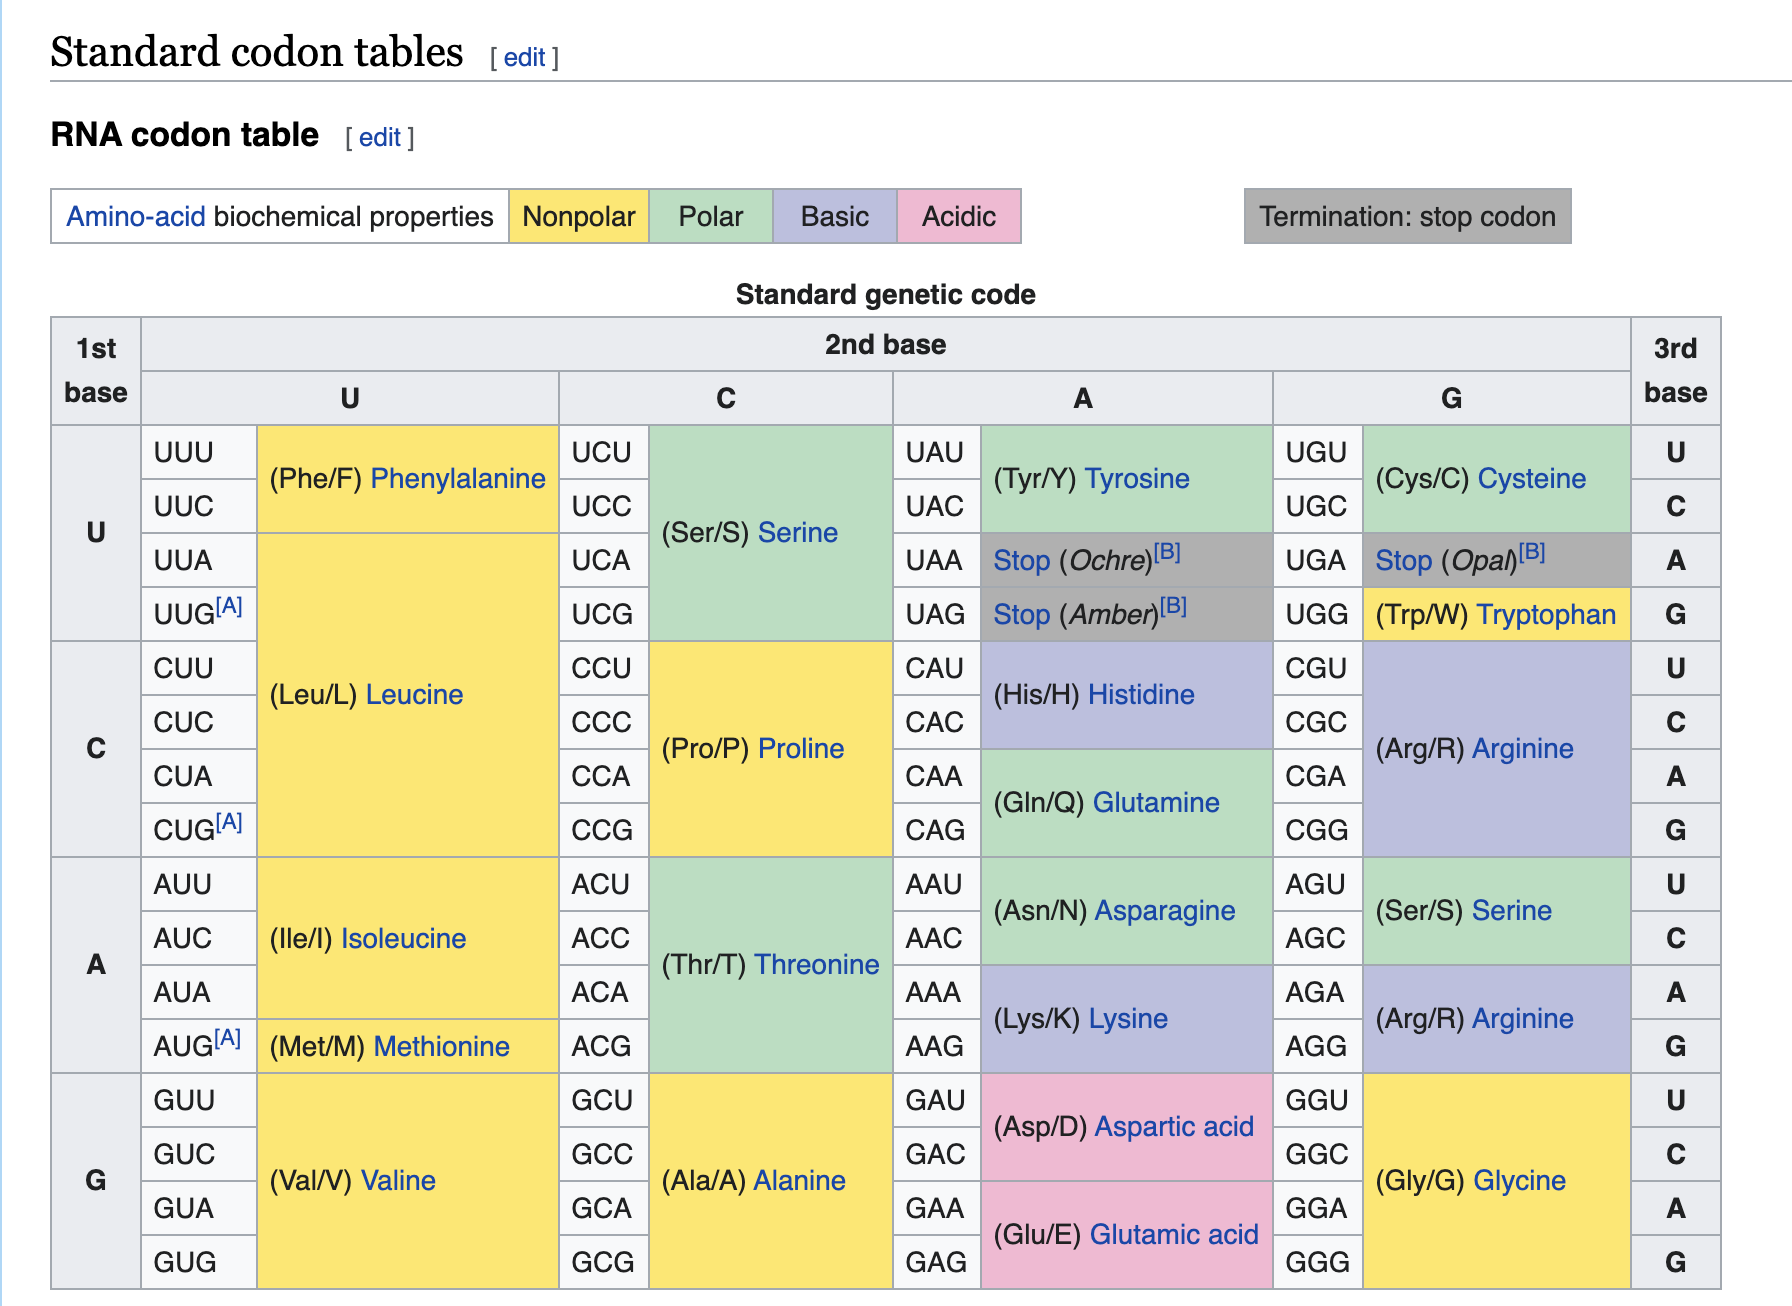

In [ ]:
!pip install biopython

In [ ]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna, generic_rna, generic_protein

In [ ]:
help(Seq)

In [ ]:
seqDNA = Seq("ATG", generic_dna)
seqRNA = Seq("AUG", generic_rna)

In [ ]:
seqDNA

In [ ]:
seqRNA

In [ ]:
seqRNA.translate()

#This method will translate DNA or RNA sequences, and those with a
#nucleotide or generic alphabet.  Trying to translate a protein 
#sequence raises an exception.

# Further info -> help(Seq.translate)

In [ ]:
 seqRNA.back_transcribe()

In [ ]:
seqDNA = seqRNA.back_transcribe()
seqDNA

In [ ]:
seqDNA.transcribe()

# PART - 4

In [ ]:
seq_A = 'AGGTAGAG'
seq_B = 'AAAATTTA'


In [ ]:
transition_matrix = { #transition 0 - transversion 1
    ("A","G") : 0,
    ("A","C") : 1,
    ("A","T") : 1,
    ("G","A") : 0,
    ("G","C") : 1,
    ("G","T") : 1,
    ("C","A") : 1,
    ("C","G") : 1,
    ("C","T") : 0,
    ("T","A") : 1,
    ("T","G") : 1,
    ("T","C") : 0,
    
}

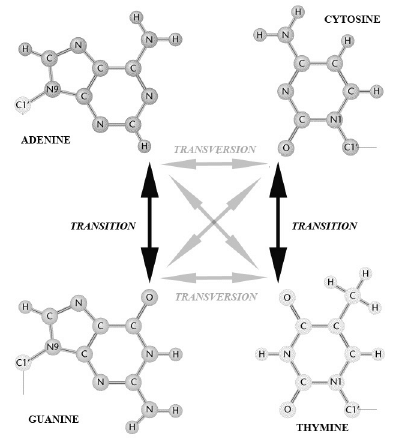

Transition versus Transversion mutations. DNA substitution mutations are of two types. Transitions are interchanges of purines (A-G) or pyrimdines (C-T), which involve bases of similar shape. Transversions are interchanges between purine and pyrmidine bases, which involve exchange of one-ring and two-ring structures.

In [ ]:
transitions = 0
transversions = 0

# seq_A = 'AGGTAGAG'
# seq_B = 'AAAATTTA'

for index, letter in enumerate(seq_A):
    if (letter != seq_B[index]):
        if (transition_matrix.get((letter, seq_B[index])) == 0):
            transitions += 1
        else:
            transversions += 1

print("transitions: ",transitions )
print("transversions: ", transversions)
print("ratio | transitions / transversions : ",(transitions/transversions))

 # Part - 5
 

In [ ]:
import re 

seq = 'GAACTGCTTAGAAC'
motif = 'GAAC'

In [ ]:
def find_motifs(seq, modif):
    return [occurance.start() for occurance in re.finditer(motif, seq)]

In [ ]:
find_motifs(seq, motif)

An alternative way

In [ ]:
def find_motifs2(seq, modif):
    return [occurance for occurance in re.finditer(motif, seq)]

In [ ]:
find_motifs2(seq, motif)

In [ ]:
help(re.finditer)

# Part - 6
Find the Longest Common Motif

In [ ]:
seq = 'GAACTGCTTAGAAC'
motif = 'GAAC'

seq2 = 'GAACTGCTTAGAAC'
motif2 = 'TAGAACAAAA'

In [ ]:
from difflib import SequenceMatcher

def longestCommonSubstring(str1,str2):
    seqMatcher = SequenceMatcher(None,str1,str2)
    match = seqMatcher.find_longest_match(0, len(str1), 0, len(str2))
    
    if match.size != 0:
        return str1[match.a : match.a + match.size]
    else:
        return "No longest substring found."



In [ ]:
longestCommonSubstring(seq, motif)

In [ ]:
longestCommonSubstring(seq2, motif2)

# Part - 7
Molecular Weight

In [ ]:
!pip install Bio

In [ ]:
dna_sequence = "ATGGCCCCG"

from Bio import SeqUtils

SeqUtils.molecular_weight(seq=dna_sequence, seq_type="DNA")

In [ ]:
protein_sequence = "SAAV"

SeqUtils.molecular_weight(seq=protein_sequence, seq_type="protein")

# Part - 8
Distance Matrix

In [1]:
# 0.00  0.40  0.10  0.10
# 0.40  0.00  0.40  0.30
# 0.10  0.40  0.00  0.20
# 0.10  0.30  0.20  0.00

sequences = ["TTTCCATTTA", "GATTCATTTC", "TTTCCATTTT", "GTTCCATTTA"]


In [2]:
def find_distance(a, b):
    diffs = 0
    for letter1, letter2 in zip(a, b):
        if letter1 != letter2:
            diffs += 1
    return diffs / len(a)



In [3]:
# what does zip do ?
# "TTT", "GCA"
# zipped
# [(T,G), (T,C), (T,A)]

In [4]:
distance_matrix = [[0 for x in range(len(sequences))] for y in range(len(sequences))]
distance_matrix

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [5]:
# 0, TTTCCATTTA ; 1, GATTCATTTC ; 2, TTTCCATTTT ; 3, GTTCCATTTA

for indexa, seqa in enumerate(sequences):
    #print(indexa,seqa,"** 1st for ** ")
    for indexb, seqb in enumerate(sequences):
        #print(indexb,seqb,"2nd for")
        distance_matrix[indexa][indexb] = find_distance(seqa,seqb)
        #print(distance_matrix, " ____myMatrix")

0 TTTCCATTTA ** 1st for ** 
0 TTTCCATTTA 2nd for
[[0.0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
1 GATTCATTTC 2nd for
[[0.0, 0.4, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
2 TTTCCATTTT 2nd for
[[0.0, 0.4, 0.1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
3 GTTCCATTTA 2nd for
[[0.0, 0.4, 0.1, 0.1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
1 GATTCATTTC ** 1st for ** 
0 TTTCCATTTA 2nd for
[[0.0, 0.4, 0.1, 0.1], [0.4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
1 GATTCATTTC 2nd for
[[0.0, 0.4, 0.1, 0.1], [0.4, 0.0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
2 TTTCCATTTT 2nd for
[[0.0, 0.4, 0.1, 0.1], [0.4, 0.0, 0.4, 0], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
3 GTTCCATTTA 2nd for
[[0.0, 0.4, 0.1, 0.1], [0.4, 0.0, 0.4, 0.3], [0, 0, 0, 0], [0, 0, 0, 0]]  ____myMatrix
2 TTTCCATTTT ** 1st for ** 
0 TTTCCATTTA 2nd for
[[0.0, 0.4, 0.1, 0.1], [0.4, 0.0, 0.4, 0.3], [0.1, 0, 0, 0], [0, 0, 0, 0]]  ____myMatri

In [6]:
distance_matrix

[[0.0, 0.4, 0.1, 0.1],
 [0.4, 0.0, 0.4, 0.3],
 [0.1, 0.4, 0.0, 0.2],
 [0.1, 0.3, 0.2, 0.0]]